# RRT

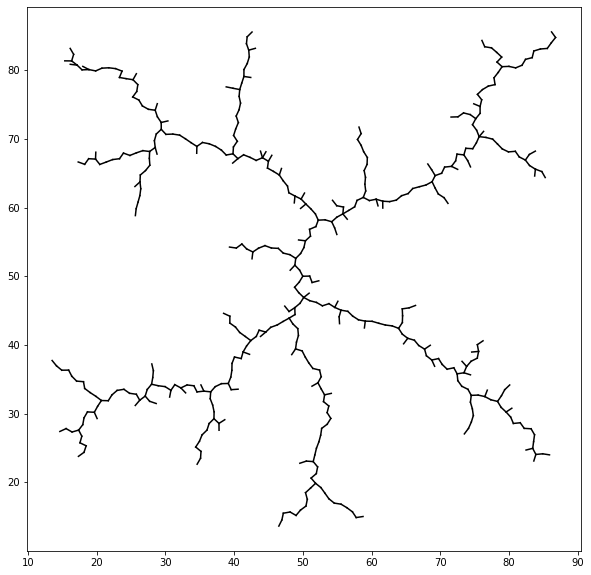

In [165]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

imagelist = []              # empty list of images

class Graph():
    def __init__(self, q_init):        
        self.start_p = q_init[0][0]
        self.end_p = q_init[0][1]
        
        self.vertices = q_init[1]
        self.tree = plt.figure()
        plt.gca().set_aspect('equal')
        self.tree.set_size_inches(10, 10)
        
    def plot_edge(self, p1, p2):
        refactor_p1, refactor_p2 = [p1[0], p2[0]], [p1[1], p2[1]]
        plt.plot(refactor_p1, refactor_p2, 'k-', figure = self.tree)
        
    def rand_config(self):
        rand_pos = self.start_p + (self.end_p - self.start_p) * [np.random.random_sample(), 
                                                                 np.random.random_sample()]
        return rand_pos
    
    def nearest_vertex(self, q):
        dist = None
        nearest = None
        for vert in self.vertices:
            curr_dist = np.linalg.norm(q - vert)
            if dist is None or curr_dist < dist:
                dist = curr_dist
                nearest = vert
        return nearest

def build_rrt(q_init, K, delta):
    graph = Graph(q_init)
    for _ in range(K):
        q_rand = graph.rand_config()        
        q_near = graph.nearest_vertex(q_rand)
        
        dir_norm = np.linalg.norm(q_rand - q_near)
        if dir_norm != 0: #very unlikely?
            q_new = q_near + delta * (q_rand - q_near) / dir_norm
            graph.vertices = np.vstack((graph.vertices, q_new))

            graph.plot_edge(q_near, q_new)
        # generate plot
#         image = plt.imshow(grid, animated=True, cmap="inferno")
#         imagelist.append([image])

#     # make animation
#     ani = animation.ArtistAnimation(fig, imagelist, interval=10, blit=True, repeat_delay=0)
#     #ani.save("rrt.mp4")
    
#     # for display in jupyter notebook
#     from IPython.display import HTML
#     HTML(ani.to_jshtml())

# q_init = ([LL UR], [verts])
q_init = [np.array([[0, 0], [100, 100]]), 
          np.array([[50, 50]])]
build_rrt(q_init, 500, 1)